# Python-base System Dynamics Engine

Import dependencies:

In [1]:
import warnings
warnings.filterwarnings("ignore")  # suppress all warnings
from StockAndFlowInPython.graph_sd.graph_engine import *
from StockAndFlowInPython.session_handler import SessionHandler
from StockAndFlowInPython.parsing.XMILE_parsing import equation_to_text, text_to_equation

## 1. A simple example of the engine itself

This is a goal-gap model containing a first-order negative feedback loop.
It is one of the examples built in this package.

SdEngine: adding element: stock0 function: None value: [100]
SdEngine: adding element: flow0 function: [<function linear at 0x0000016E53C23CA8>, 'quotient0'] value: []
SdEngine: adding element: quotient0 function: [<function division at 0x0000016E5730E438>, 'gap0', 'at0'] value: []
SdEngine: adding element: goal0 function: None value: [20]
SdEngine: adding element: gap0 function: [<function subtraction at 0x0000016E5730E4C8>, 'stock0', 'goal0'] value: []
SdEngine: adding element: at0 function: None value: [5]


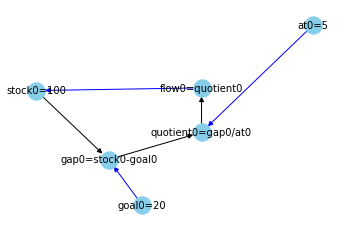

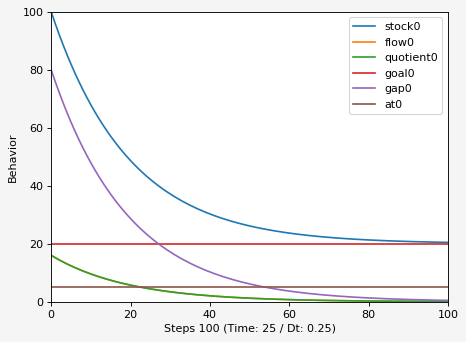

In [2]:
structure_0 = Structure()
structure_0.first_order_negative()
structure_0.simulate(simulation_time=100, dt=0.25)
structure_0.draw_graphs_with_function_value_polarity()
structure_0.display_results()

The structure and result are shown as above.

## 2. Human-level interface for model construction

The package can be used to build a model from scratch.
A human-level interface is provided. It is wrapped into the class "SessionHandler".

The utilities include:
* Add different elements to a model
* Delete elements from a model
* Specify and change their equations
* View the model structure
* Simulate and view results

We use the "tea cup" model as an example, which shows how a tea cup containing hot water cools down to room temperature.

Key parameters:

* Initial temperature of the tea cup: 100(C)
* Room temperature: 20(C)
* Average time for cooling down: 5

In [3]:
session_0 = SessionHandler()

Tea cup (a stock)

In [4]:
session_0.build_stock(name="Tea_cup",
                      initial_value=100,)

===>Building stock: Tea_cup
Generating location. Isolated.
Generated position for Tea_cup at x = 270, y = 283.
SdEngine: adding element: Tea_cup function: None value: [100]


1

Room temperature (an auxiliary)

In [5]:
session_0.build_aux(name="Room_temp",
                    equation=20)

===>Building aux: Room_temp
    Building aux: Room_temp is linked to []
Generating location. Isolated.
Generated position for Room_temp at x = 370, y = 245.
SdEngine: adding element: Room_temp function: None value: [20]


2

Adjustment time (an auxiliary)

In [6]:
session_0.build_aux(name="Adjustment_time",
                    equation=5)

===>Building aux: Adjustment_time
    Building aux: Adjustment_time is linked to []
Generating location. Isolated.
Generated position for Adjustment_time at x = 331, y = 287.
SdEngine: adding element: Adjustment_time function: None value: [5]


3

Temp gap (an auxiliary)

In [7]:
session_0.build_aux(name="Temp_gap",
                    equation="Room_temp-Tea_cup")
session_0.build_connector(from_var="Room_temp",
                          to_var="Temp_gap",
                          polarity="positive")
session_0.build_connector(from_var="Tea_cup",
                          to_var="Temp_gap",
                          polarity="negative")

===>Building aux: Temp_gap
    Building aux: Temp_gap is linked to ['Room_temp', 'Tea_cup']
Generating location. Linked to 2 variables.
Generated position for Temp_gap at x = 307, y = 222.
SdEngine: adding element: Temp_gap function: [<function subtraction at 0x0000016E5730E4C8>, 'Room_temp', 'Tea_cup'] value: []


Adjustment in temperature (a flow)

In [8]:
session_0.build_flow(name="Adj_in_temp",
                     equation="Temp_gap/Adjustment_time",
                     flow_to="Tea_cup")
session_0.connect_stock_flow(flow_name="Adj_in_temp",
                             new_flow_to="Tea_cup")
session_0.build_connector(from_var="Temp_gap",
                          to_var="Adj_in_temp",
                          polarity="positive")
session_0.build_connector(from_var="Adjustment_time",
                          to_var="Adj_in_temp",
                          polarity="negative")

===>Building flow: Adj_in_temp
    Building flow: Adj_in_temp is linked to ['Temp_gap', 'Adjustment_time']
Generating location. Linked to 2 variables.
This flow flows to Tea_cup
Generated position for Adj_in_temp at x = 163, y = 283.
SdEngine: adding element: Adj_in_temp function: [<function division at 0x0000016E5730E438>, 'Temp_gap', 'Adjustment_time'] value: []


Display model structure

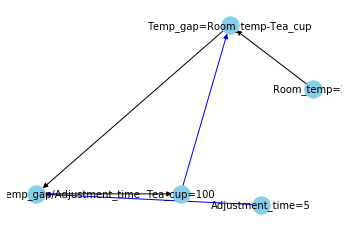

In [9]:
session_0.model_structure.draw_graphs_with_function_value_polarity()

Simulate the model and show the result

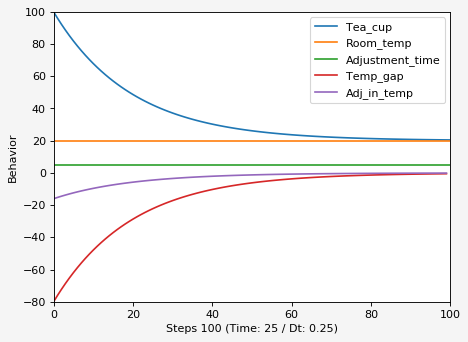

In [10]:
session_0.simulation_handler(simulation_time=25,
                             time_step=0.25)
session_0.model_structure.display_results()

## 3. Incorporation with external data sources

One thing we are interested in is the interaction between an SD model and various types of external data sources.

We provide an interface to use a time series as the value of a variable.
The variable will be labeled as "external", and its own value (static or dynamic) will be overwritten.

Now we assume that the room temperature in the last case is not a constant (20), but changes between 20 and 30.
The time series is stored in a .csv file. We are going to use it as the value for 'room_temp'.

Define data source

In [11]:
import pathlib
csv_file_path = pathlib.Path('./StockAndFlowInPython/case/room_temperature.csv')

Configure data_feeder and specify variable to overwrite


In [12]:
session_0.model_structure.data_feeder.initialise(data_source=csv_file_path.absolute())
session_0.model_structure.data_feeder.set_var_source(var_name='Room_temp',
                           csv_column='room_temp')
session_0.model_structure.set_external('Room_temp') # tell the engine to use external sources for value

This is the external data we are going to use for room temperature:

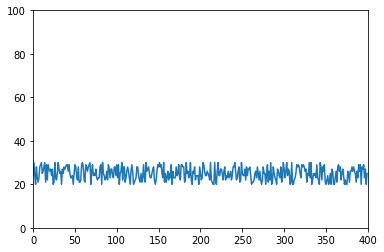

In [13]:
import matplotlib.pyplot as plt
plt.axis([0,400,0,100])
plt.plot(session_0.model_structure.data_feeder.buffers_list['Room_temp'])

Simulate and view result

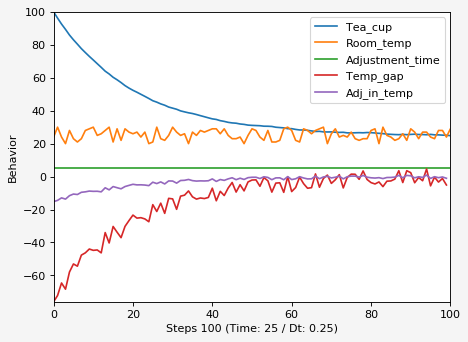

In [14]:
session_0.simulation_handler(simulation_time=25,
                             time_step=0.25)
session_0.model_structure.display_results()

The result shows that variable 'Room temperature' is using external data.